# Face Detection using CNN (Convolutional Neural Network)

## Dependencies

Berikut adalah daftar modules dan packages yang perlu kita install untuk dapat mengikuti tutorial ini:

- [OpenCV](https://opencv.org/)
- [dlib](http://dlib.net/)
- [opencv-python](https://pypi.org/project/opencv-python/): ```pip install -U opencv-python```
- [python-dlib](https://pypi.org/project/dlib/):```pip install dlib```
- [Matplotlib](https://matplotlib.org/): ```pip install -U matplotlib```

## Import Modules

Berikut adalah beberapa Python modules yang perlu kita import untuk dapat mengikuti tutorial ini.

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
%matplotlib inline

## Global Identifiers

OpenCV menawarkan 4 buah pre-trained classifier yang dapat kita gunakan untuk mendeteksi wajah manusia. Keempat classifier ini di-training dengan menggunakan metode HAAR Cascade atau biasa dikenal sebagai Viola-Jones detector.

Dalam tutorial ini terdapat beberapa file foto yang dapat digunakan untuk mempelajari deteksi wajah.

In [2]:
CLASSIFIER_PATH = './dlib/cnn/mmod_human_face_detector.dat'
IMAGE_PATH = './dataset/classroom/03.jpg'
# IMAGE_PATH = './dataset/babies/03.jpg'

## Global Functions

In [3]:
def get_xywh(detection):
    rectangle = detection.rect   
    top_left = rectangle.tl_corner()
    x, y = top_left.x, top_left.y
    w = rectangle.width()
    h = rectangle.height()
    return x, y, w, h

## Load Image Dataset

Membuat objek image OpenCV

In [4]:
bgr_img = cv2.imread(IMAGE_PATH)
rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)

## Load Classifier

Memuat pre-trained classifier.

In [5]:
detector = dlib.cnn_face_detection_model_v1(CLASSIFIER_PATH)

## Face Detection

Melakukan proses deteksi wajah menggunakan pre-trained classifier.

In [6]:
detections = detector(rgb_img, 1)
detections = tuple(detections)
detections

(<dlib.mmod_rectangle at 0x7f0d95bcefb8>,
 <dlib.mmod_rectangle at 0x7f0d95bd9180>)

Ekstraksi kumpulan wajah yang terdeteksi ke dalam format tupple.

In [7]:
faces = sorted(tuple(get_xywh(data)) for data in detections)
faces = tuple(faces)
faces

((9, 376, 69, 69),
 (424, 418, 69, 69),
 (461, 269, 40, 41),
 (529, 261, 40, 41),
 (649, 265, 40, 41),
 (874, 399, 83, 83),
 (897, 253, 40, 41),
 (915, 300, 69, 69))

## Show Detection Results

Memberi penanda kotak pada setiap wajah yang berhasil dideteksi.

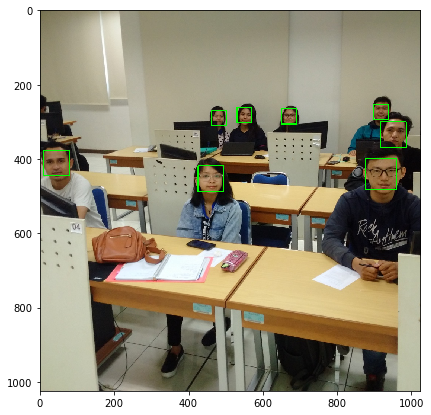

In [8]:
rgb_color = (0, 255, 0)
for face in faces:
    x, y, w, h = face
    cv2.rectangle(rgb_img, (x, y), (x+w, y+h), rgb_color, 2) 

plt.figure(figsize=(7, 7))
plt.imshow(rgb_img)